In [18]:
%matplotlib inline


# 1D Wasserstein barycenter demo

This example illustrates the computation of regularized Wassersyein Barycenter
as proposed in [3].


[3] Benamou, J. D., Carlier, G., Cuturi, M., Nenna, L., & Peyré, G. (2015).
Iterative Bregman projections for regularized transportation problems
SIAM Journal on Scientific Computing, 37(2), A1111-A1138.


In [19]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

# sphinx_gallery_thumbnail_number = 4
import fermat as F
import numpy as np
import scipy.sparse as sp
from scipy.spatial import  distance_matrix
from sklearn.manifold import TSNE
from scipy.optimize import minimize
from sklearn.neighbors import KDTree
from scipy.optimize import LinearConstraint
from scipy.sparse import csr_matrix


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pl
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

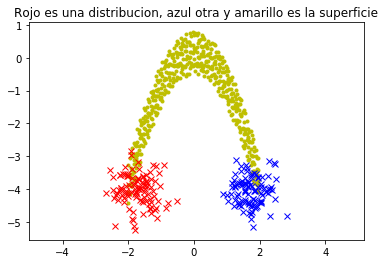

In [36]:
puntos=100

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1)
W=np.concatenate((x,y),axis=1)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)
#W=np.concatenate((W,-W-[0,8]),axis=0)

"""


W=np.concatenate((W,np.random.random((300,2))*[4,1]-[2,4.5]),axis=0)


W=np.random.random((300,2))*[4,1]-[2,4.5]
"""

y1, y2 = np.random.multivariate_normal([1.7,-4], [[0.2,0],[0,0.2]], puntos).T
y1=np.array(y1)
y2=np.array(y2)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

Ycol=np.concatenate((y1,y2),axis=1)
Y=Ycol.flatten()


x1, x2 = np.random.multivariate_normal([-1.7,-4], [[0.2,0],[0,0.2]], puntos).T
x1=np.array(x1)
x2=np.array(x2)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
Zcol=np.concatenate((x1,x2),axis=1)
Z=Zcol.flatten()





plt.plot(W[:,0],W[:,1],'.',c='y')
plt.plot(x1,x2,'x',c='r')
plt.plot(y1,y2,'x',c='b')
plt.axis('equal')
plt.title('Rojo es una distribucion, azul otra y amarillo es la superficie')
plt.show()

In [43]:

data=np.concatenate((Zcol,Ycol,W),axis=0)
a=np.concatenate((np.ones(puntos),np.ones(data.shape[0]-puntos)*1e-15))/puntos
b=np.roll(a,puntos)
A = np.vstack((a, b)).T
n_distributions = A.shape[1]


alpha=2


method='FW'
model=F.Fermat(alpha, path_method=method,k=100)
model.fit(np.matrix(distance_matrix(data,data)))
fermat_distances = model.get_distances()


M = fermat_distances

#M=ot.utils.dist(data,data) #EUCLIDEO AL CUADRADO
#M=distance_matrix(data,data) #EUCLIDEO

M=M**2

M=np.ascontiguousarray(M)
M /= M.max()

In [44]:
alpha2 = 0.8  # 0<=alpha<=1
weights = np.array([1 - alpha2, alpha2])

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

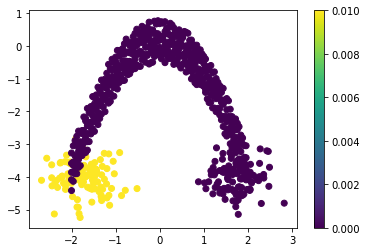

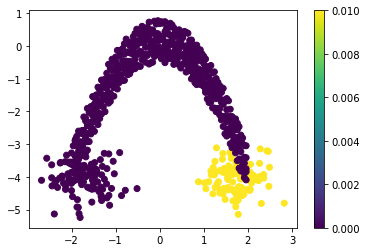

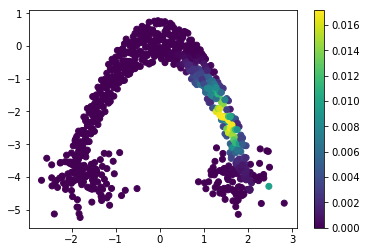

In [45]:
for aux in [a,b,bary_wass]:
    fig, ax = plt.subplots()
    im = ax.scatter(data[:,0], data[:,1], c=aux)
    fig.colorbar(im, ax=ax)

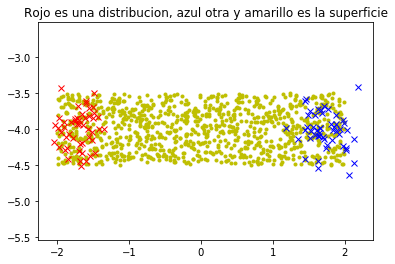

In [7]:
puntos=50
"""
dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1)
W=np.concatenate((x,y),axis=1)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)
W=np.concatenate((W,-W-[0,8]),axis=0)



W=np.concatenate((W,np.random.random((300,2))*[4,1]-[2,4.5]),axis=0)

"""

W=np.random.random((1000,2))*[4,1]-[2,4.5]


y1, y2 = np.random.multivariate_normal([1.7,-4], [[0.05,0],[0,0.05]], puntos).T
y1=np.array(y1)
y2=np.array(y2)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

Ycol=np.concatenate((y1,y2),axis=1)
Y=Ycol.flatten()


x1, x2 = np.random.multivariate_normal([-1.7,-4], [[0.05,0],[0,0.05]], puntos).T
x1=np.array(x1)
x2=np.array(x2)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
Zcol=np.concatenate((x1,x2),axis=1)
Z=Zcol.flatten()





plt.plot(W[:,0],W[:,1],'.',c='y')
plt.plot(x1,x2,'x',c='r')
plt.plot(y1,y2,'x',c='b')
plt.axis('equal')
plt.title('Rojo es una distribucion, azul otra y amarillo es la superficie')
plt.show()

In [8]:
data=np.concatenate((Zcol,Ycol,W),axis=0)
a=np.concatenate((np.ones(puntos),np.ones(data.shape[0]-puntos)*1e-15))/puntos
b=np.roll(a,puntos)
A = np.vstack((a, b)).T
n_distributions = A.shape[1]


alpha=1


method='FW'
model=F.Fermat(alpha, path_method=method,k=100)
model.fit(np.matrix(distance_matrix(data,data)))
fermat_distances = model.get_distances()


M = fermat_distances
M=M**2

#M=ot.utils.dist(data,data) #EUCLIDEO AL CUADRADO
#M=distance_matrix(data,data) #EUCLIDEO

M=np.ascontiguousarray(M)
M /= M.max()

In [9]:
alpha2 = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha2, alpha2])

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

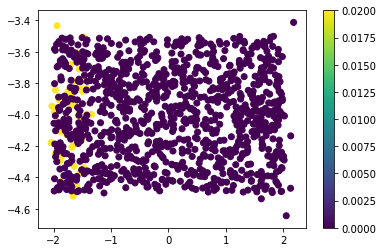

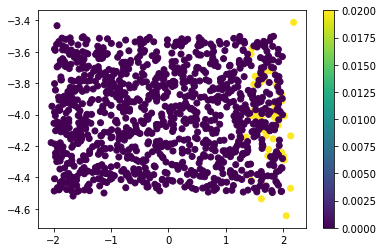

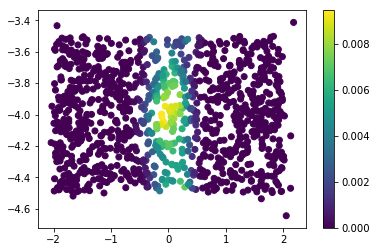

In [10]:
for aux in [a,b,bary_wass]:
    fig, ax = plt.subplots()
    im = ax.scatter(data[:,0], data[:,1], c=aux)
    fig.colorbar(im, ax=ax)

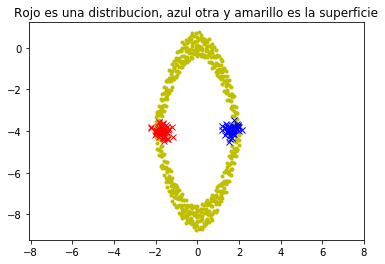

In [11]:
puntos=50

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1)
W=np.concatenate((x,y),axis=1)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.5
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) -0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)

dx=4/puntos
x=np.array([-2+i*dx for i in range(puntos)]).reshape(-1,1)
y=-x*x.reshape(-1,1) +0.3*np.random.random(puntos).reshape(-1,1) +0.25
W=np.concatenate((W,np.concatenate((x,y),axis=1)),axis=0)
W=np.concatenate((W,-W-[0,8]),axis=0)





y1, y2 = np.random.multivariate_normal([1.7,-4], [[0.05,0],[0,0.05]], puntos).T
y1=np.array(y1)
y2=np.array(y2)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

Ycol=np.concatenate((y1,y2),axis=1)
Y=Ycol.flatten()


x1, x2 = np.random.multivariate_normal([-1.7,-4], [[0.05,0],[0,0.05]], puntos).T
x1=np.array(x1)
x2=np.array(x2)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
Zcol=np.concatenate((x1,x2),axis=1)
Z=Zcol.flatten()





plt.plot(W[:,0],W[:,1],'.',c='y')
plt.plot(x1,x2,'x',c='r')
plt.plot(y1,y2,'x',c='b')
plt.axis('equal')
plt.title('Rojo es una distribucion, azul otra y amarillo es la superficie')
plt.show()

In [12]:
data=np.concatenate((Zcol,Ycol,W),axis=0)
a=np.concatenate((np.ones(puntos),np.ones(data.shape[0]-puntos)*1e-15))/puntos
b=np.roll(a,puntos)
A = np.vstack((a, b)).T
n_distributions = A.shape[1]


alpha=2


method='FW'
model=F.Fermat(alpha, path_method=method,k=100)
model.fit(np.matrix(distance_matrix(data,data)))
fermat_distances = model.get_distances()


M = fermat_distances

#M=ot.utils.dist(data,data) EUCLIDEO AL CUADRADO
#M=distance_matrix(data,data) EUCLIDEO
M=M**2

M=np.ascontiguousarray(M)
M /= M.max()

In [13]:
alpha2 = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha2, alpha2])

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

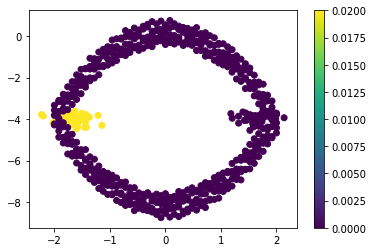

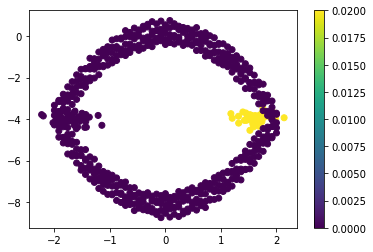

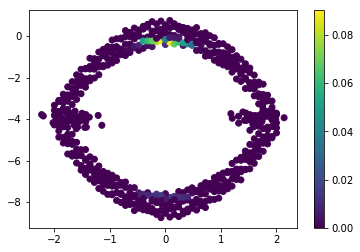

In [14]:
for aux in [a,b,bary_wass]:
    fig, ax = plt.subplots()
    im = ax.scatter(data[:,0], data[:,1], c=aux)
    fig.colorbar(im, ax=ax)